# 20.01 - Degree and Betweenness Centrallity

Centrality is a measure of how important a node is to a network. However, defining importance isn't a trivial matter. Are nodes with a high number of in and outcoming edges more important than those with a lower number? Does it matter whether these are primarily incoming, or outgoing edges? Or should we focus less on the number of connections and instead determine whether a node is essential to other nodes to reach eachother, or perhaps even more stringent - where a node is more likely than others to be part of the shortest path between any two nodes in the network?<br>
 
This demo showcases two centrality algorithms (degree and betweeness) for two different synthetic graphs topologies, which will highlight that the measures might converge for some graphs, but that their similarity is a function of graph topology: for some graphs, the centrality estimates for the nodes are quite different. 

### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import multivariate_normal as mnorm
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

### Fonts for display

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Transform a distance matrix to a graph

In [3]:
def distance2graph(D,threshold):
    
    #Distance to Graph
    G = {}
    edgelist = []
    for i in range(D.shape[0]):
        v = D[i,:]
        edges = np.where(v < threshold)[0]
        edges = [edge for edge in edges if edge != i]
        G[i] = edges
        for edge in edges:
            edgelist.append((i,edge))

    #Return
    return G,edgelist

### Create Synthetic Graph 1

In [4]:
no_nodes = 30
np.random.seed(seed=125)
rv = mnorm([0,0],[[1,0],[0,1]])
X1 = rv.rvs(no_nodes)
X1[0,:] = [0,0]
D = squareform(pdist(X1))
threshold = 1.00
G1,edgelist1 = distance2graph(D,threshold)

### Create Synthetic Graph 2

In [5]:
no_nodes = 30
np.random.seed(seed=195)
rv1 = mnorm([-2,0],[[0.75,0],[0,0.75]])
rv2 = mnorm([+2,0],[[0.75,0],[0,0.75]])
x1 = rv1.rvs(no_nodes)
x2 = rv2.rvs(no_nodes)
X2 = np.vstack((x1,x2))
X2[0,:] = [0,0]
D = squareform(pdist(X2))
threshold = 1.0
G2,edgelist2 = distance2graph(D,threshold)

### Convert to networkx graph and compute centrality measures

In [6]:
nG1 = nx.Graph(edgelist1)
dc1 = nx.degree_centrality(nG1)
bc1 = nx.betweenness_centrality(nG1)

nG2 = nx.Graph(edgelist2)
dc2 = nx.degree_centrality(nG2)
bc2 = nx.betweenness_centrality(nG2)

### Compute Ranges

In [7]:
dc1_values = []
bc1_values = []
dc2_values = []
bc2_values = []
for item in dc1:
    dc1_values.append(dc1[item])
for item in dc2:
    dc2_values.append(dc2[item])
for item in bc1:
    bc1_values.append(bc1[item])
for item in bc2:
    bc2_values.append(bc2[item])
dc1_range = [np.min(dc1_values),np.max(dc1_values)]
dc2_range = [np.min(dc2_values),np.max(dc2_values)]
bc1_range = [np.min(bc1_values),np.max(bc1_values)]
bc2_range = [np.min(bc2_values),np.max(bc2_values)]

### Plot Both Graph for Degree Centrality

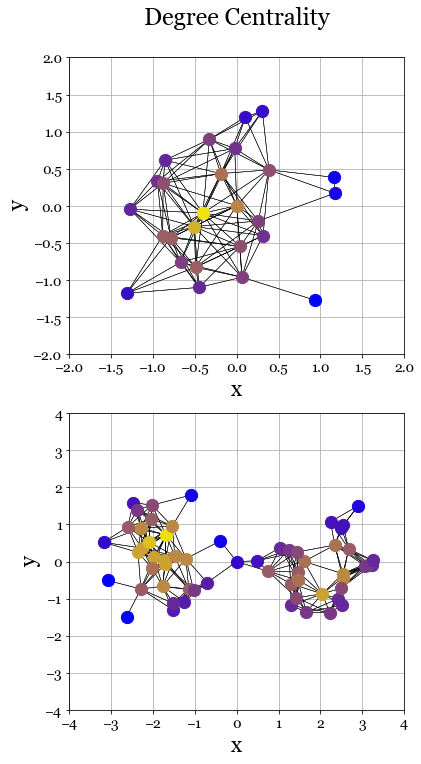

In [9]:
plt.figure(figsize=(6,12))
plt.subplot(2,1,1)
for node1 in G1:
    edges = G1[node1]
    for node2 in edges:
        xy1 = X1[node1,:]
        xy2 = X1[node2,:]
        plt.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],c=(0,0,0),linewidth=0.5)
    value = (dc1[node1] - dc1_range[0]) / dc1_range[1]
    plt.scatter(X1[node1,0],X1[node1,1],s=150,color=(value,value**2,1-value),zorder=1000);
plt.grid();
plt.axis((-2,2,-2,2));
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.title('Degree Centrality\n',fontsize=24,**csfont);

plt.subplot(2,1,2)
for node1 in G2:
    edges = G2[node1]
    for node2 in edges:
        xy1 = X2[node1,:]
        xy2 = X2[node2,:]
        plt.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],c=(0,0,0),linewidth=0.5)
    value = (dc2[node1] - dc2_range[0]) / dc2_range[1]
    plt.scatter(X2[node1,0],X2[node1,1],s=150,color=(value,value**2,1-value),zorder=1000);
plt.grid();
plt.axis((-4,4,-4,4));
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.savefig('../../assets/matplotlib/020_centrality_1.png',dpi=300,bbox_inches="tight")

### Plot Both Graphs for Betweeness Centrality

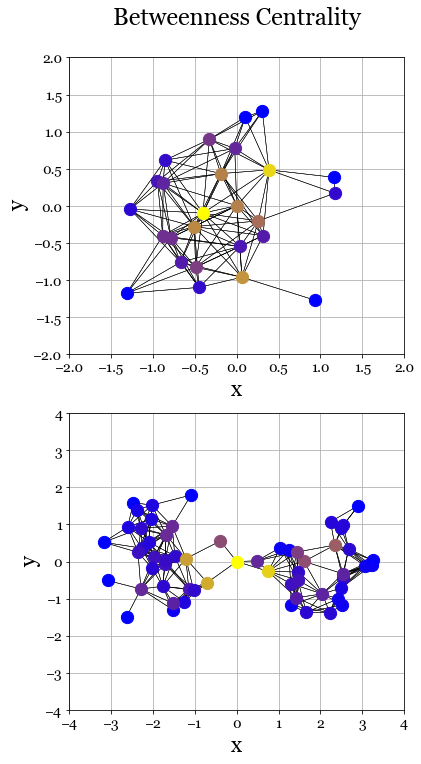

In [10]:
plt.figure(figsize=(6,12))
plt.subplot(2,1,1)
for node1 in G1:
    edges = G1[node1]
    for node2 in edges:
        xy1 = X1[node1,:]
        xy2 = X1[node2,:]
        plt.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],c=(0,0,0),linewidth=0.5)
    value = (bc1[node1] - bc1_range[0]) / bc1_range[1]
    value = value ** 0.5
    plt.scatter(X1[node1,0],X1[node1,1],s=150,color=(value,value**2,1-value),zorder=1000);
plt.grid();
plt.axis((-2,2,-2,2));
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.title('Betweenness Centrality\n',fontsize=24,**csfont);

plt.subplot(2,1,2)
for node1 in G2:
    edges = G2[node1]
    for node2 in edges:
        xy1 = X2[node1,:]
        xy2 = X2[node2,:]
        plt.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],c=(0,0,0),linewidth=0.5)
    value = (bc2[node1] - bc2_range[0]) / bc2_range[1]
    value = value ** 0.5
    plt.scatter(X2[node1,0],X2[node1,1],s=150,color=(value,value**2,1-value),zorder=1000);
plt.grid();
plt.axis((-4,4,-4,4));
plt.xticks(fontsize=14,**csfont);
plt.yticks(fontsize=14,**csfont);
plt.xlabel('x',fontsize=22,**csfont);
plt.ylabel('y',fontsize=22,**csfont);
plt.savefig('../../assets/matplotlib/020_centrality_2.png',dpi=300,bbox_inches="tight")